## Deconvolve microtubules phantom

In this example we use clij2fft richardson lucy to deconvolve the microtubules phantom from here http://bigwww.epfl.ch/deconvolution/data/microtubules/

The purpose of this example is to show the effect of regularization

In [2]:
import matplotlib.pyplot as plt
from skimage.io import imread
from tnia.plotting.projections import show_xyz_max

In [3]:
from decon_helper import image_path

image_name = image_path / 'microtubules/input.tif'
psf_name = image_path / 'microtubules/psf.tif'
truth_name = image_path / 'microtubules/ground-truth.tif'


tnia available
stackview available


In [4]:
im=imread(image_name)
psf=imread(psf_name)
truth=imread(truth_name)

# crop PSF to make decon a bit faster 

In [5]:
from tnia.nd.ndutil import centercrop
psf=centercrop(psf, (128,128,128))
psf.shape

(128, 128, 128)

In [6]:
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc

In [13]:
iterations = 2000
decon_tv_0=richardson_lucy_nc(im, psf, iterations, 0)
decon_tv_0001=richardson_lucy_nc(im, psf, iterations, 0.0001)
decon_tv_001=richardson_lucy_nc(im, psf, iterations, 0.001)

get lib

Richardson Lucy Started
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 
Richardson Lucy Finishedget lib

Richardson Lucy Started
0 10 20 30 40 50 60 

In [14]:
from tnia.metrics.errors import RMSE
import pandas as pd
df=pd.DataFrame(columns=['method','RMSE'])


df.loc[len(df.index)]=['truth',RMSE(truth,truth)]
df.loc[len(df.index)]=['image ',RMSE(truth,im)]
df.loc[len(df.index)]=['decon rf=0 ',RMSE(truth,decon_tv_0)]
df.loc[len(df.index)]=['decon rf=0.0001 ',RMSE(truth,decon_tv_0001)]
df.loc[len(df.index)]=['decon rf=0.001 ',RMSE(truth,decon_tv_001)]
                      
df.style.hide(axis='index')

method,RMSE
truth,0.000000
image,580.465576
decon rf=0,398.522888
decon rf=0.0001,389.548767
decon rf=0.001,411.254181


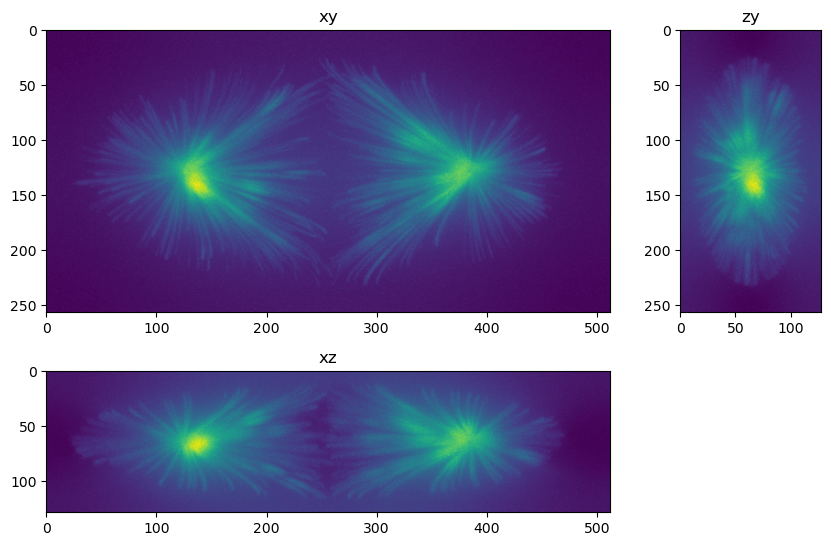

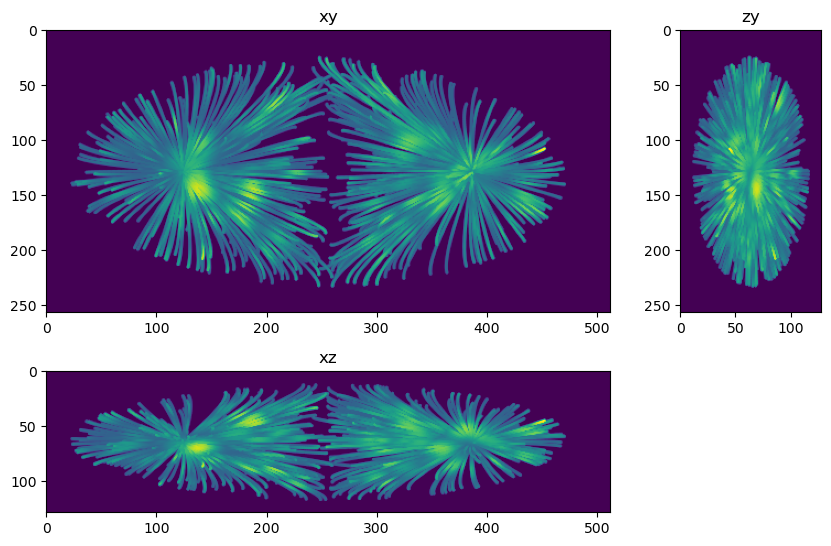

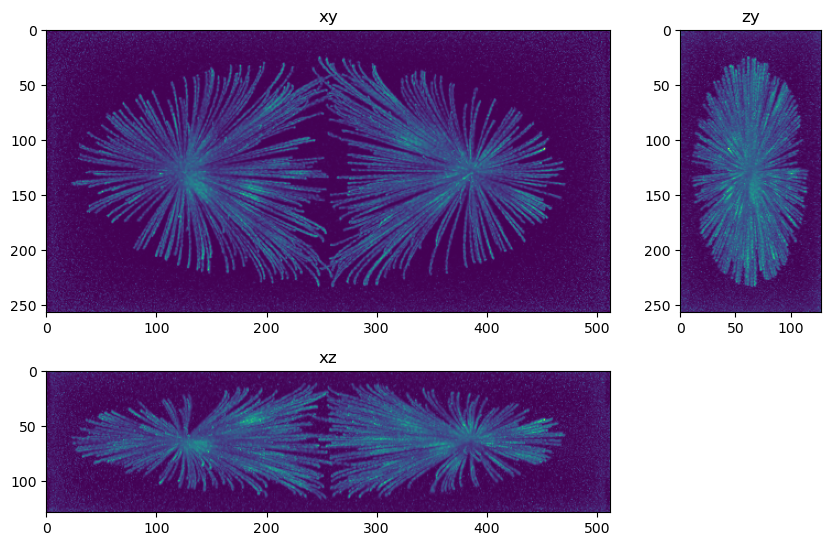

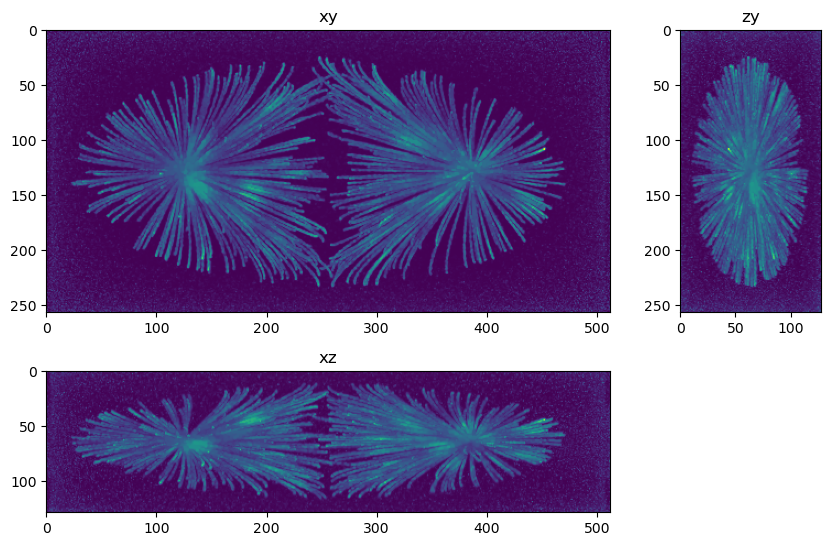

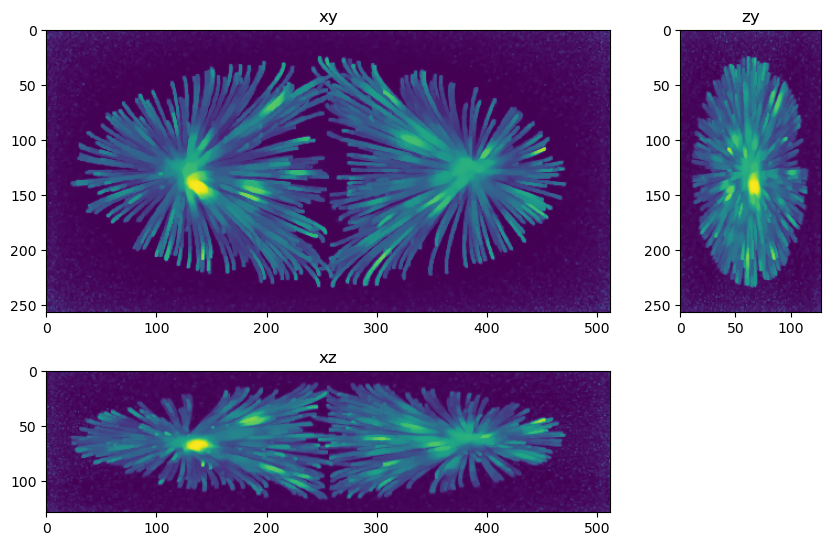

In [16]:
from tnia.plotting.projections import show_xyz_max
fig=show_xyz_max(im,figsize=(10,7))
fig=show_xyz_max(truth,figsize=(10,7))
fig=show_xyz_max(decon_tv_0,figsize=(10,7))
fig=show_xyz_max(decon_tv_0001,figsize=(10,7))
fig=show_xyz_max(decon_tv_001,figsize=(10,7))

## Questions and exercises

1.  How would you write python code to test a combination of iteration numbers and regularization factors to study the effect of the two?  
2.  Write code that crops a smaller subsection of the image (to increase the speed we can perform experiments) and test iteration number of 1000, 2000 and 5000 and regularization factor of 0.000, 0.0001, and 0.0001.  (Make sure the cropped area still contains structure)